# **Import And Install Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

# **Load the Dataset**

In [2]:
df = pd.read_csv("/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv")

# **Understand And Organize the Dataset**

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.sample(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
6703,CHEVROLET,Silverado,PICKUP TRUCK - STANDARD,3.0,6,A10,D,10.2,7.2,8.9,32,238
1649,JAGUAR,XFR,MID-SIZE,5.0,8,AS8,E,21.3,14.1,18.1,16,290
1411,DODGE,CHARGER SRT 392 HEMI,FULL-SIZE,6.4,8,A8,Z,15.7,9.5,12.9,22,297
5736,FORD,EcoSport,SUV - SMALL,1.0,3,AS6,X,8.6,8.1,8.4,34,196
5687,CHEVROLET,Trax,SUV - SMALL,1.4,4,M6,X,9.4,6.9,8.3,34,194


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [7]:
df.describe(include= "object").T

,count,unique,top,freq
Make,7385,42,FORD,628
Model,7385,2053,F-150 FFV,32
Vehicle Class,7385,16,SUV - SMALL,1217
Transmission,7385,27,AS6,1324
Fuel Type,7385,5,X,3637


In [8]:
df.shape

(7385, 12)

In [9]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [10]:
df.duplicated().sum()

1103

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.shape

(6282, 12)

***Edit column names for better understanding of features and easy operation***

In [13]:
df.columns = df.columns.str.replace(" (L/100 km)", "")
df.columns = df.columns.str.replace("(L)", "")
df.columns = df.columns.str.replace("(g/km)", "")
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.lower()

In [14]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb',
       'fuel_consumption_comb_(mpg)', 'co2_emissions'],
      dtype='object')

***It looks better and more understandable now***

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make                         6282 non-null   object 
 1   model                        6282 non-null   object 
 2   vehicle_class                6282 non-null   object 
 3   engine_size                  6282 non-null   float64
 4   cylinders                    6282 non-null   int64  
 5   transmission                 6282 non-null   object 
 6   fuel_type                    6282 non-null   object 
 7   fuel_consumption_city        6282 non-null   float64
 8   fuel_consumption_hwy         6282 non-null   float64
 9   fuel_consumption_comb        6282 non-null   float64
 10  fuel_consumption_comb_(mpg)  6282 non-null   int64  
 11  co2_emissions                6282 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 638.0+ KB


# **EDA (Exploratory Data Analysis)**

## **Pairplots**

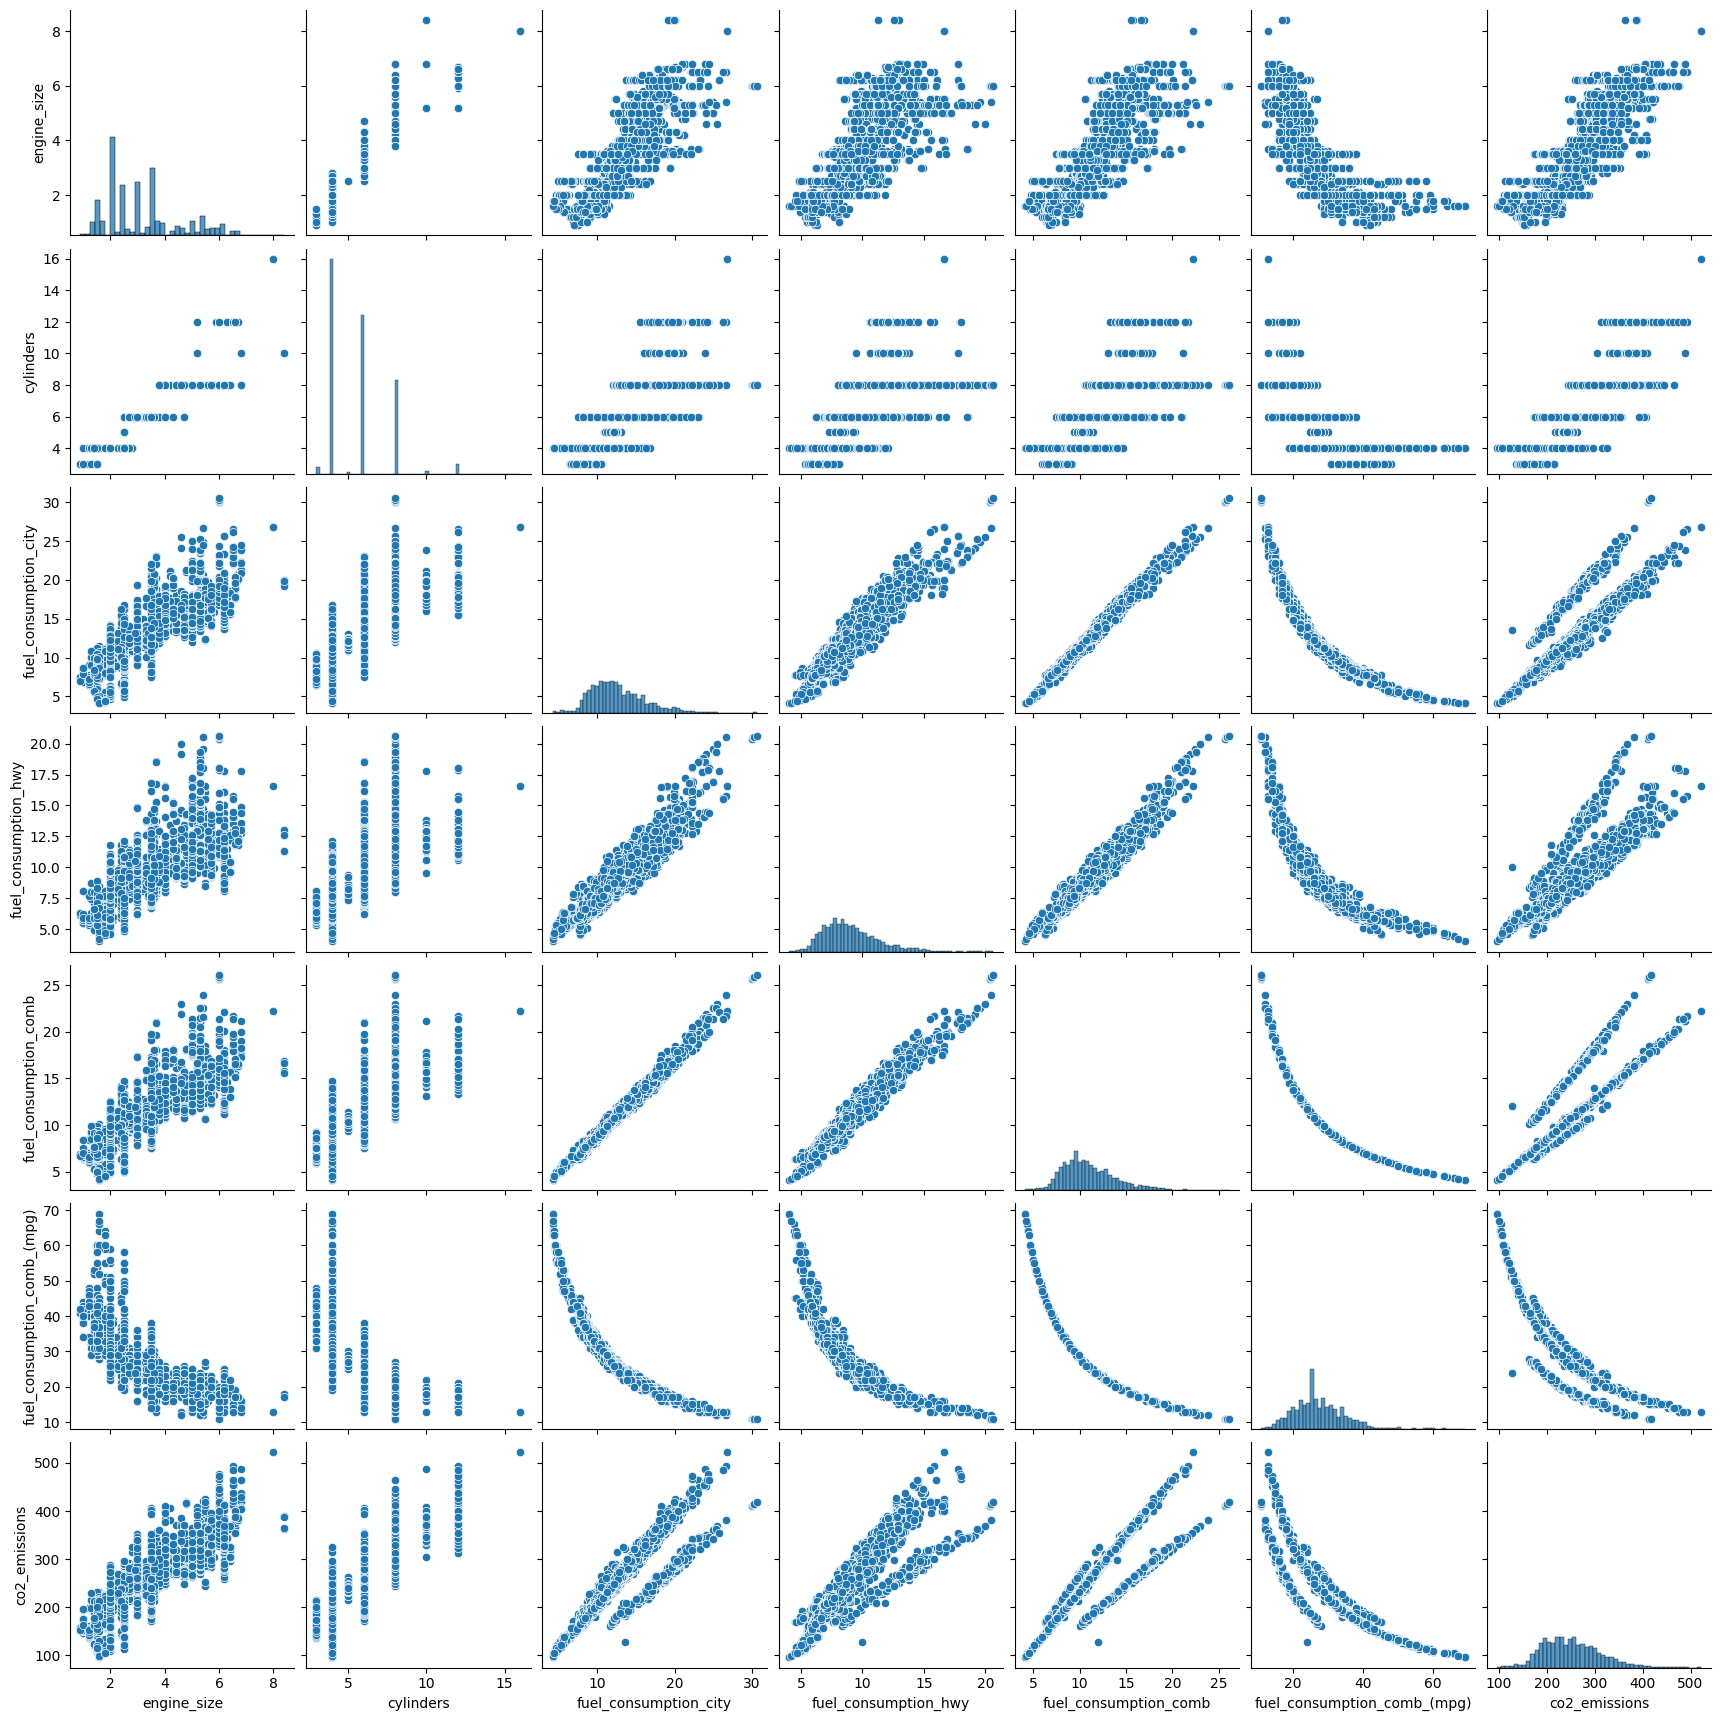

In [16]:
sns.pairplot(df)

## Pairplot hue='make'  

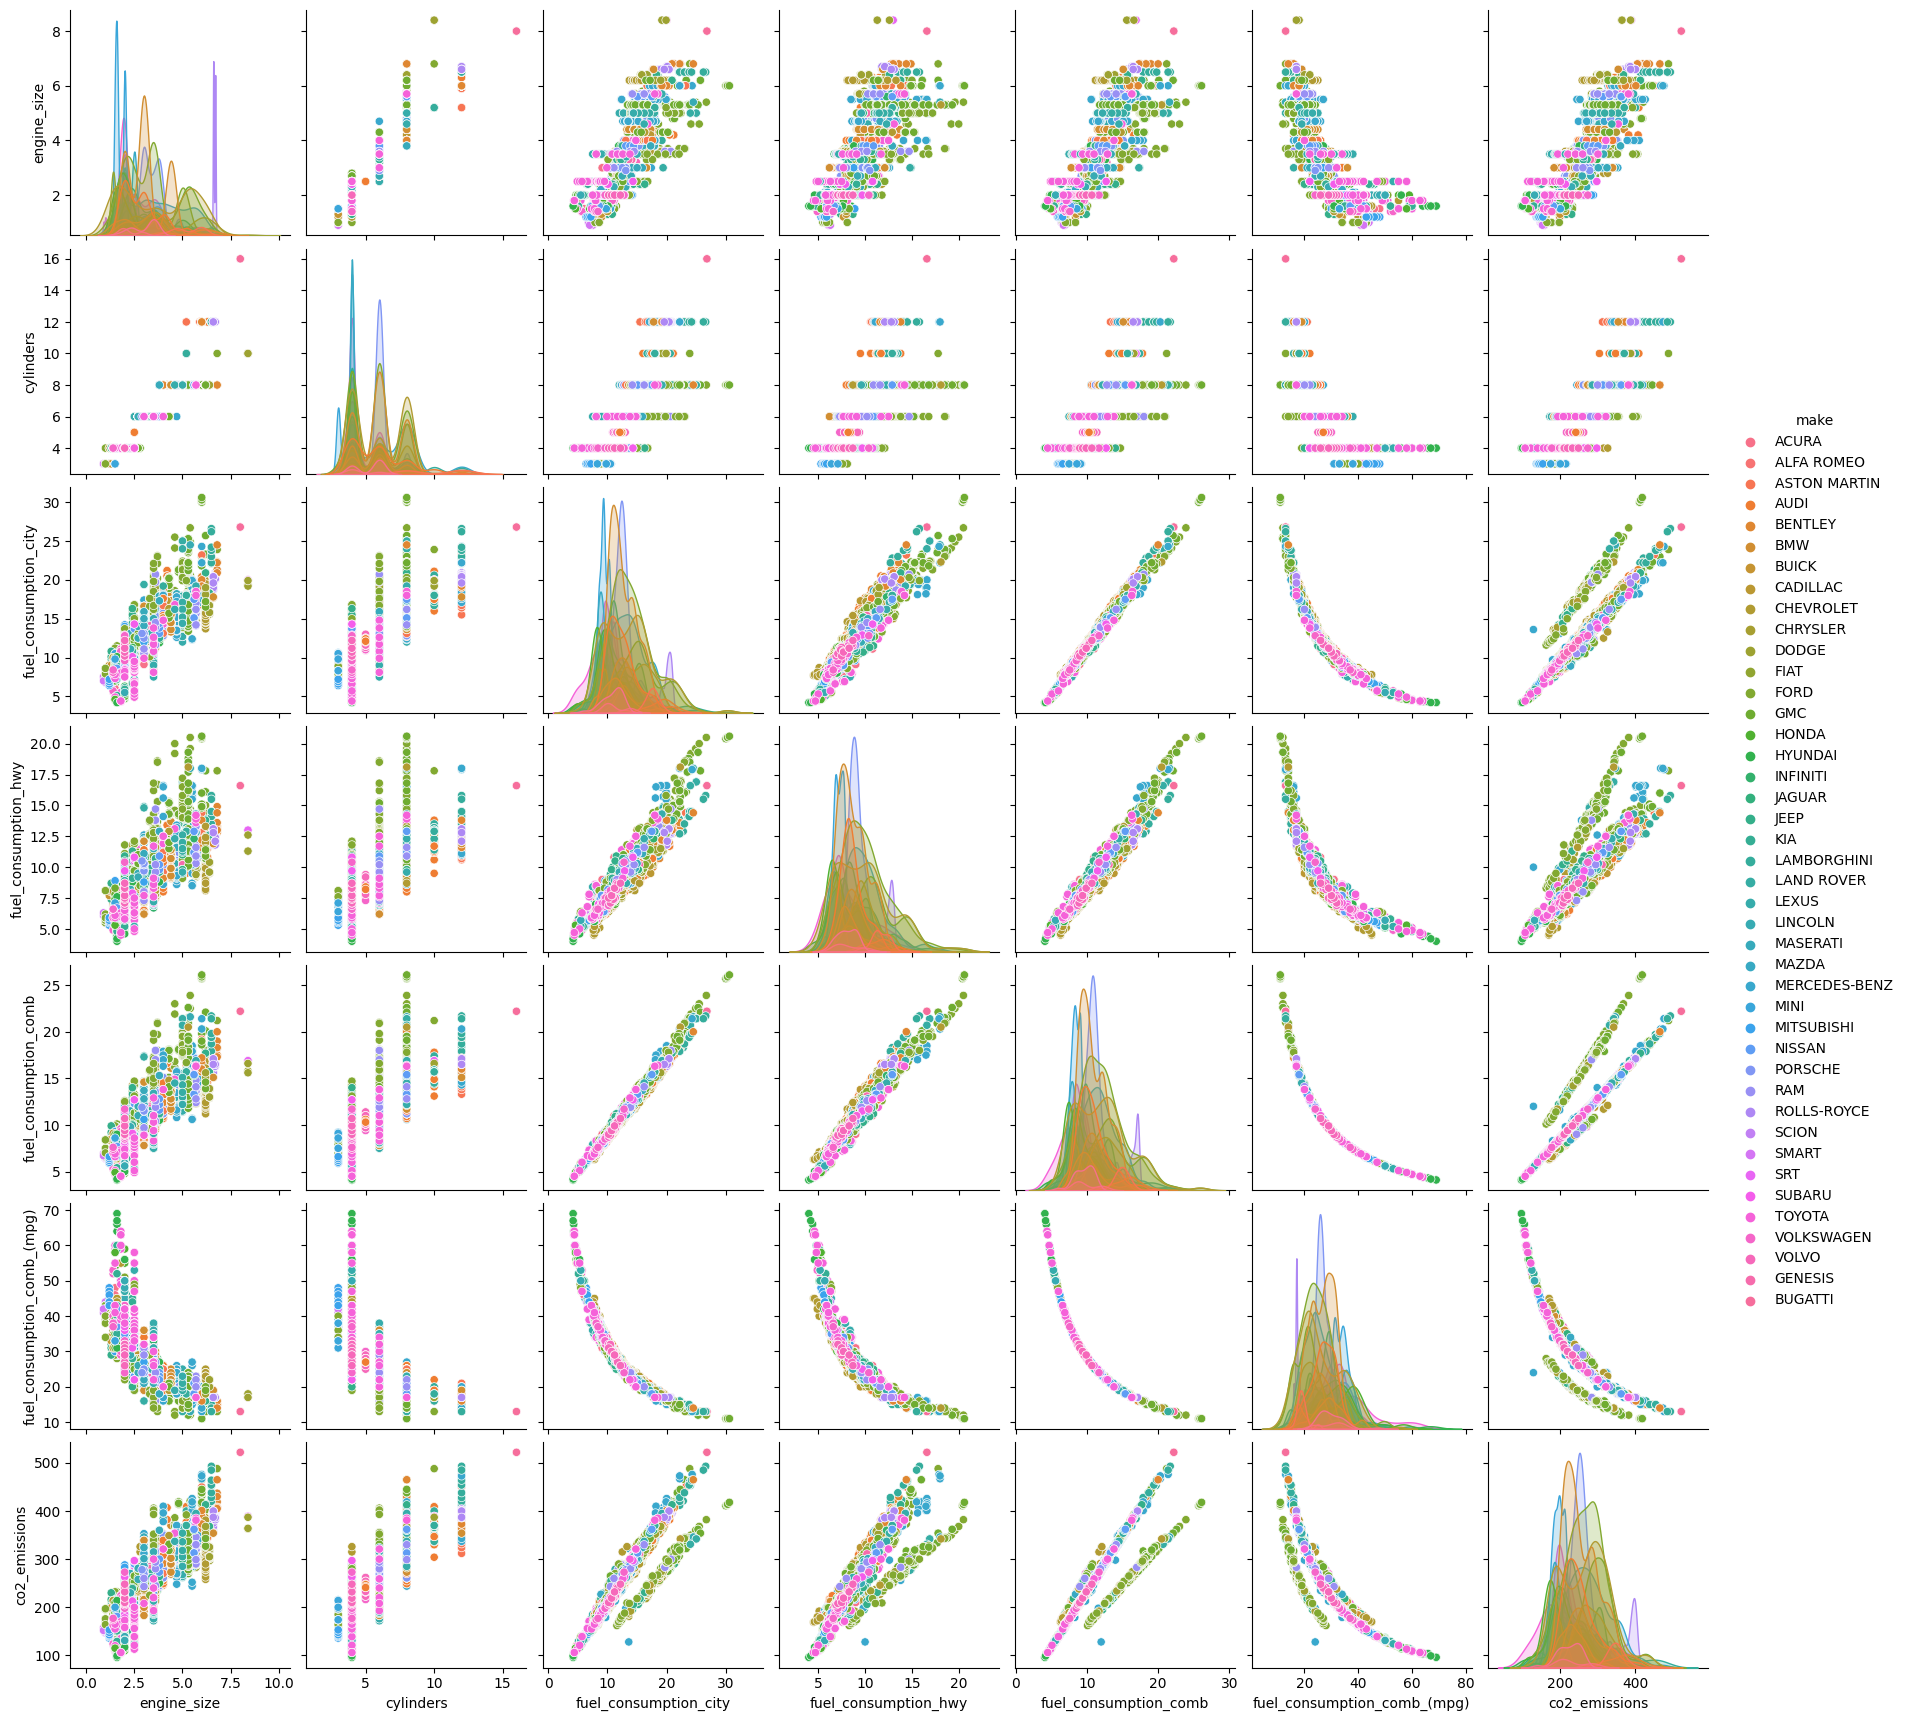

In [17]:
sns.pairplot(df, hue='make')

## **Distribution Analysis of Categorical Variables**

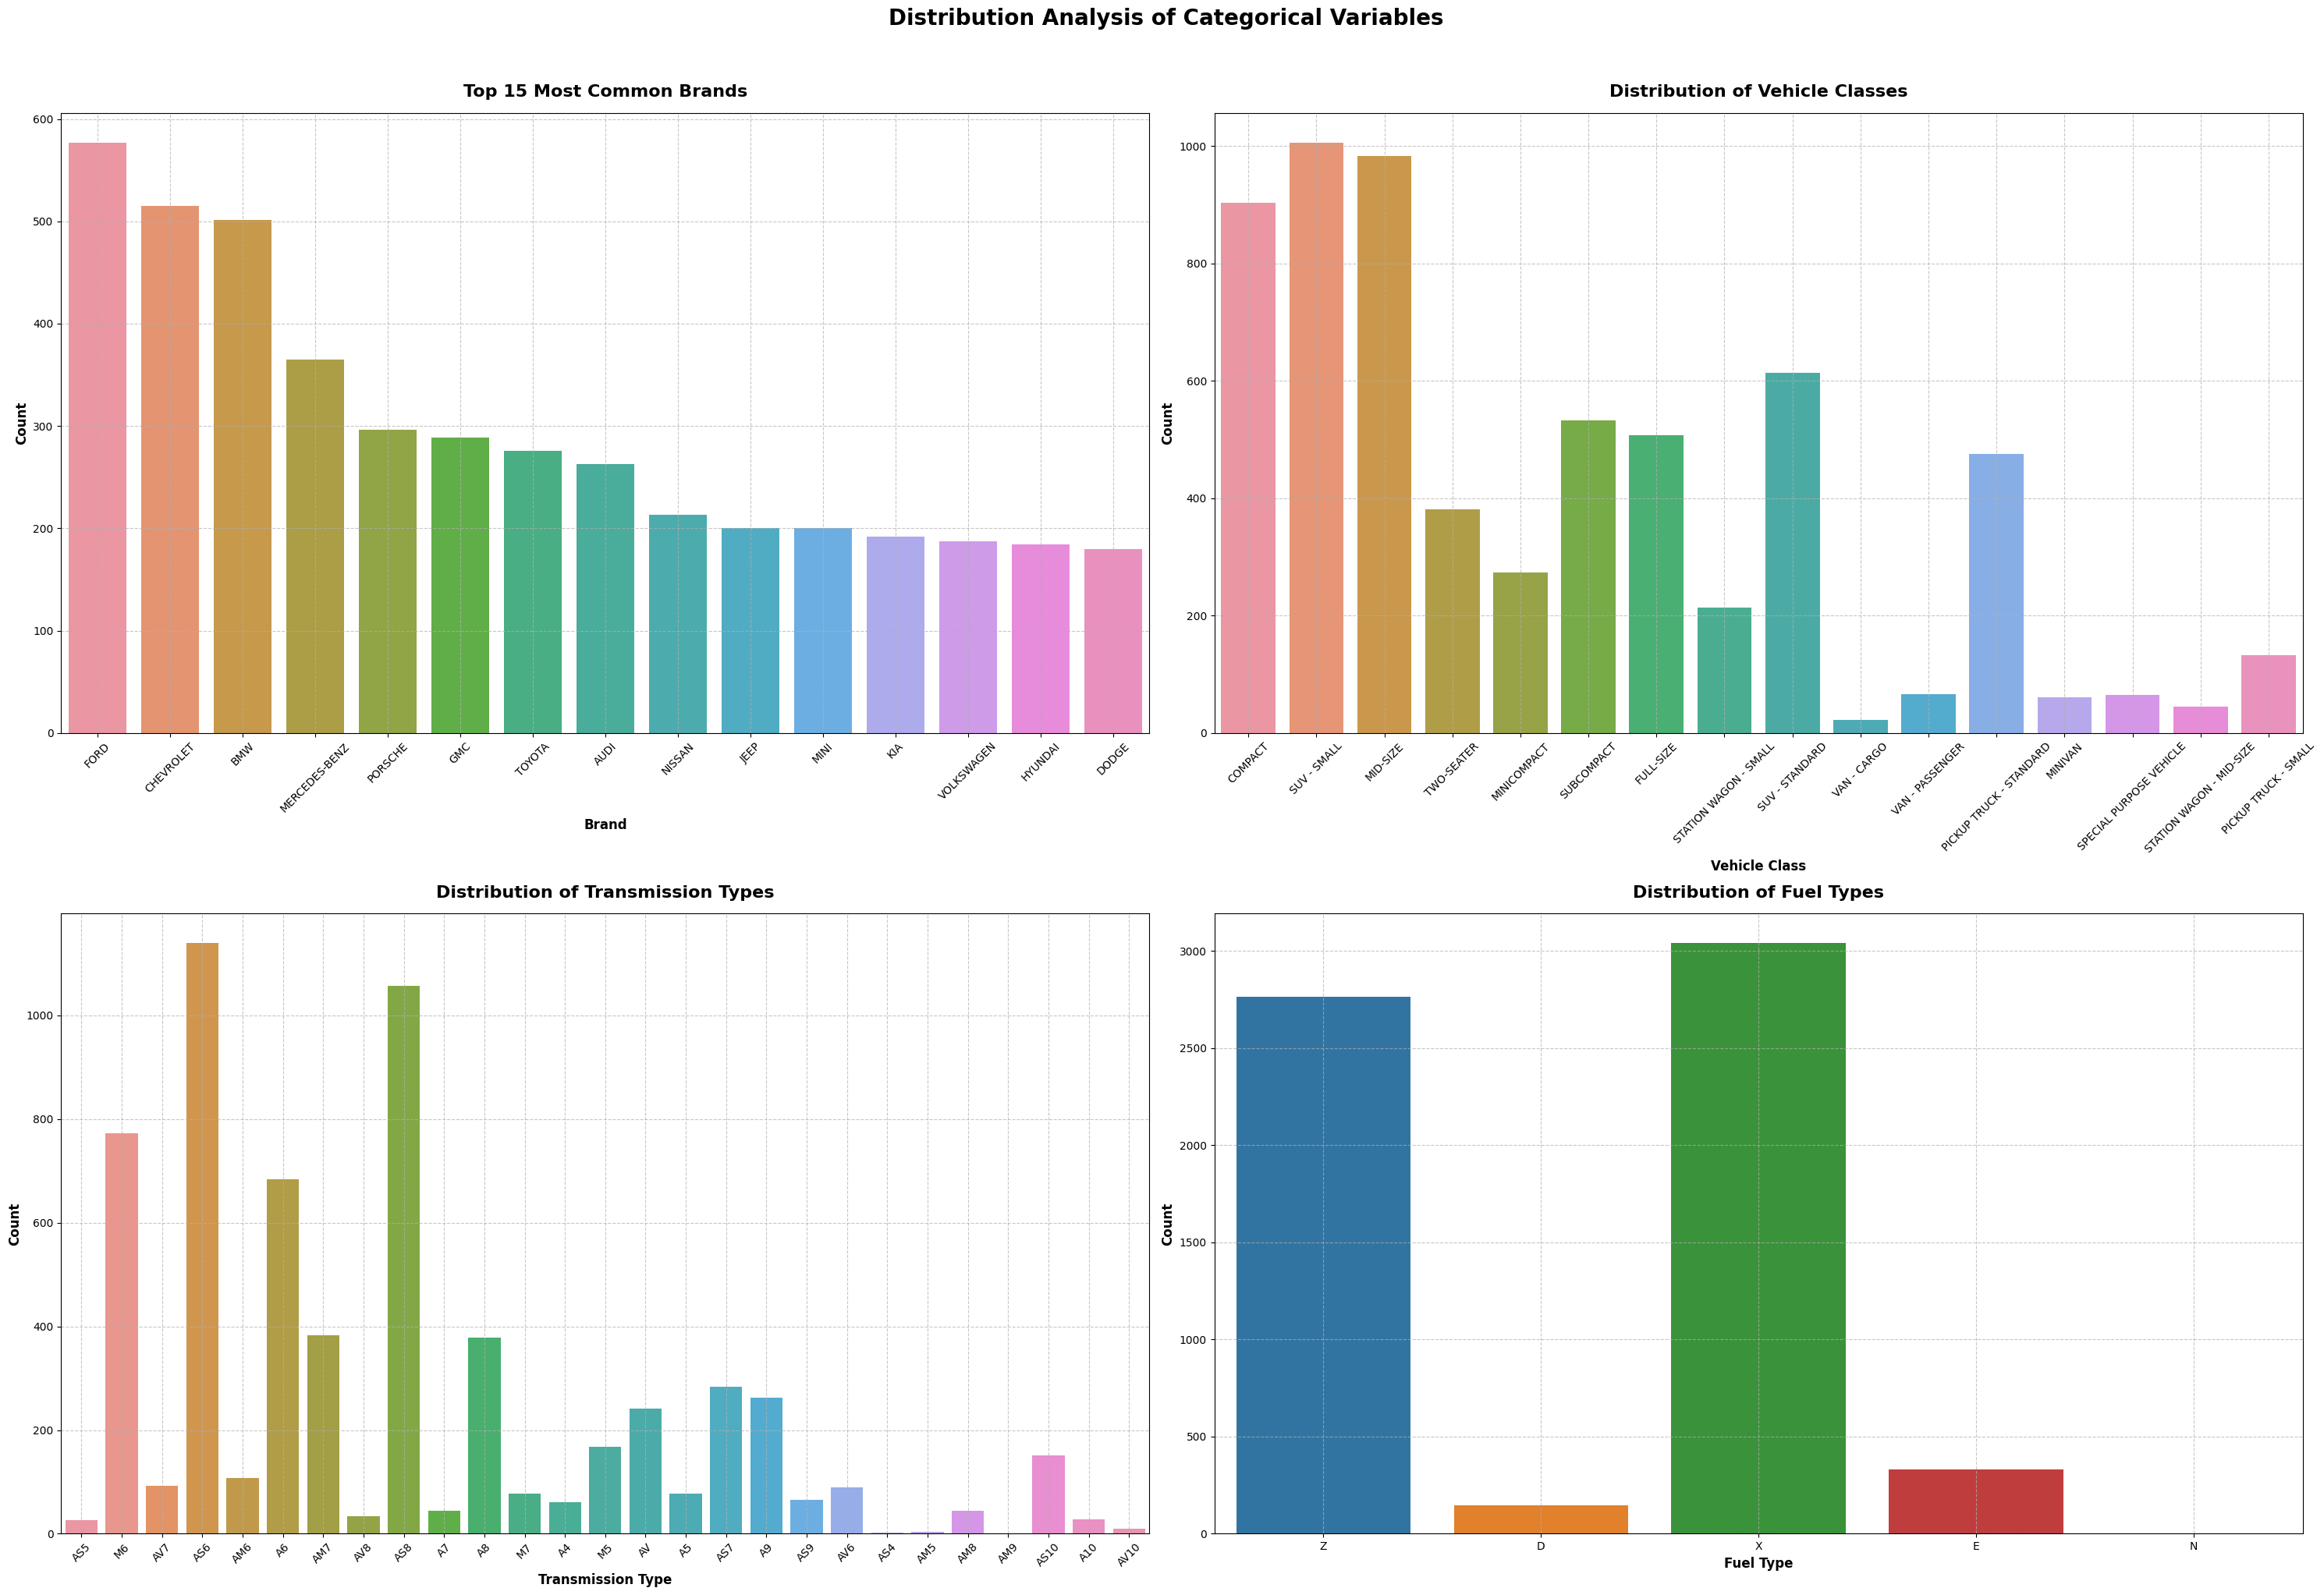

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(30, 20))

sns.countplot(data=df, x='make', ax=axes[0,0], 
              order=df['make'].value_counts().iloc[:15].index)
axes[0,0].set_title('Top 15 Most Common Brands', pad=15, fontsize=16, fontweight='bold')
axes[0,0].set_xlabel('Brand', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0,0].tick_params(axis='y', labelsize=10)
axes[0,0].grid(True, linestyle='--', alpha=0.7)

sns.countplot(data=df, x='vehicle_class', ax=axes[0,1])
axes[0,1].set_title('Distribution of Vehicle Classes', pad=15, fontsize=16, fontweight='bold')
axes[0,1].set_xlabel('Vehicle Class', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45, labelsize=10)
axes[0,1].tick_params(axis='y', labelsize=10)
axes[0,1].grid(True, linestyle='--', alpha=0.7)

sns.countplot(data=df, x='transmission', ax=axes[1,0])
axes[1,0].set_title('Distribution of Transmission Types', pad=15, fontsize=16, fontweight='bold')
axes[1,0].set_xlabel('Transmission Type', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45, labelsize=10)
axes[1,0].tick_params(axis='y', labelsize=10)
axes[1,0].grid(True, linestyle='--', alpha=0.7)

sns.countplot(data=df, x='fuel_type', ax=axes[1,1])
axes[1,1].set_title('Distribution of Fuel Types', pad=15, fontsize=16, fontweight='bold')
axes[1,1].set_xlabel('Fuel Type', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1,1].tick_params(axis='x', labelsize=10)
axes[1,1].tick_params(axis='y', labelsize=10)
axes[1,1].grid(True, linestyle='--', alpha=0.7)

plt.suptitle('Distribution Analysis of Categorical Variables', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## **Correlation Between Numerical Variables** 

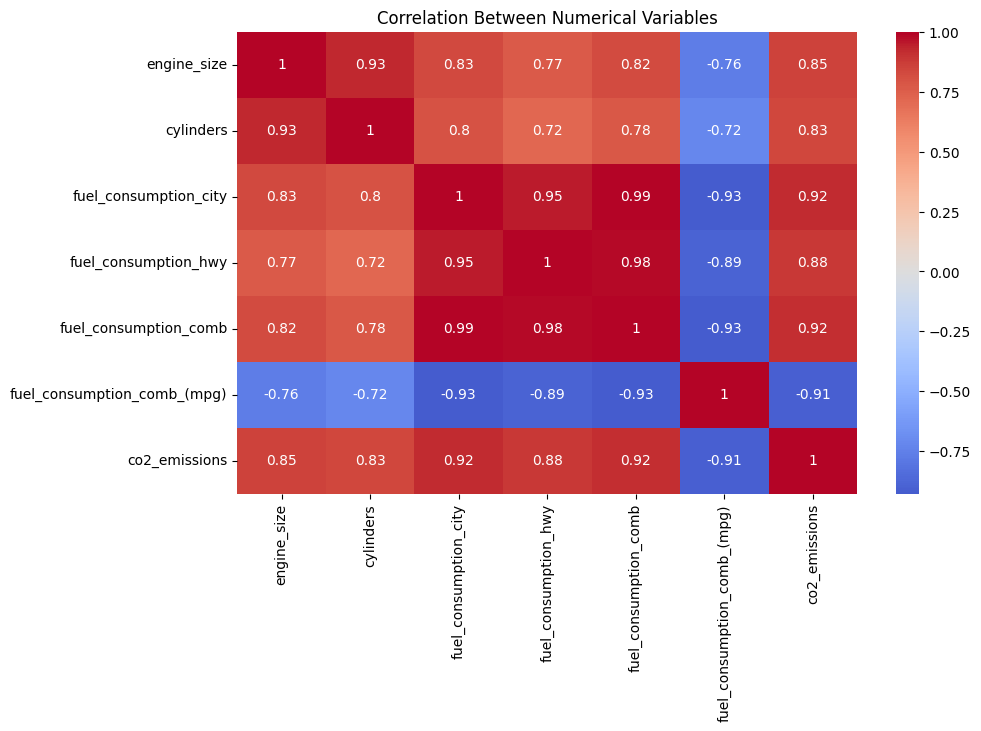

In [19]:
numeric_cols = ['engine_size', 'cylinders', 'fuel_consumption_city', 
                'fuel_consumption_hwy', 'fuel_consumption_comb', 
                'fuel_consumption_comb_(mpg)', 'co2_emissions']

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Numerical Variables')
plt.show()


## **Boxplots of Some Features**

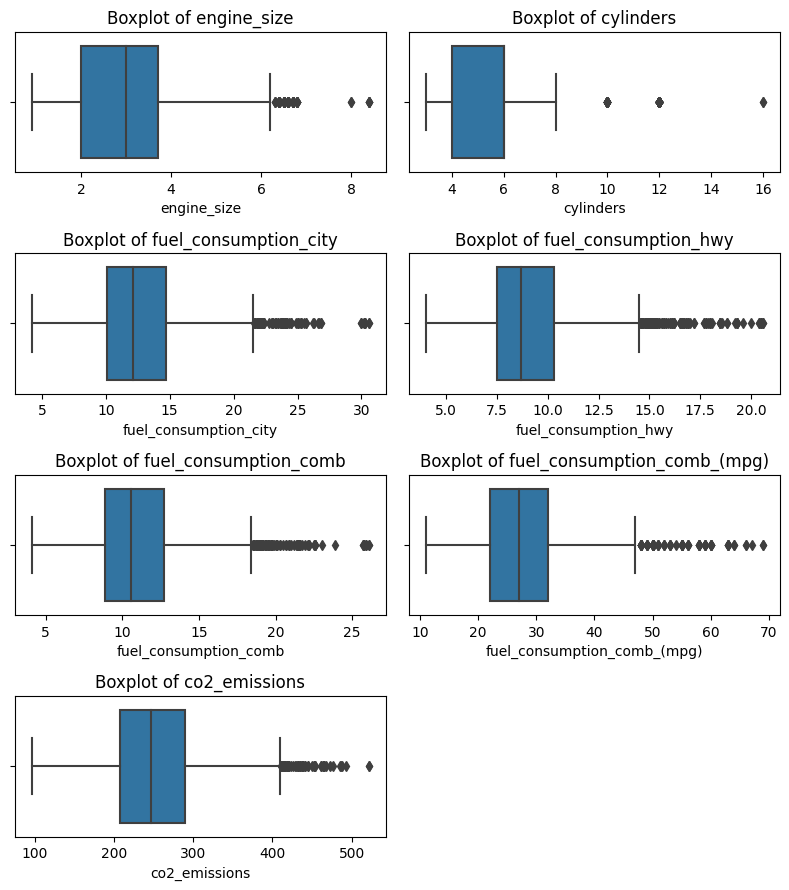

In [20]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(8, 13))

axes = axes.flatten()

for index, column in enumerate(numeric_cols):
    sns.boxplot(data=df, x=column, ax=axes[index])
    axes[index].set_title(f'Boxplot of {column}')

for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## **Engine Size vs CO2 Emissions**

***Relationship between engine size and CO2 emissions***

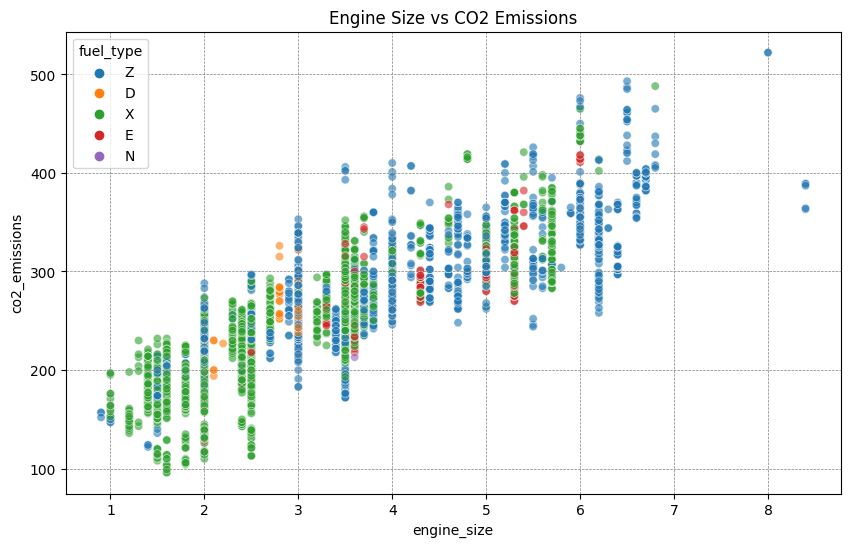

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='engine_size', y='co2_emissions', hue='fuel_type', alpha=0.6)
plt.title('Engine Size vs CO2 Emissions')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.show()

## **Boxplots of City/Highway/Combined Fuel Consumption Distributions**

***Fuel consumption distributions***

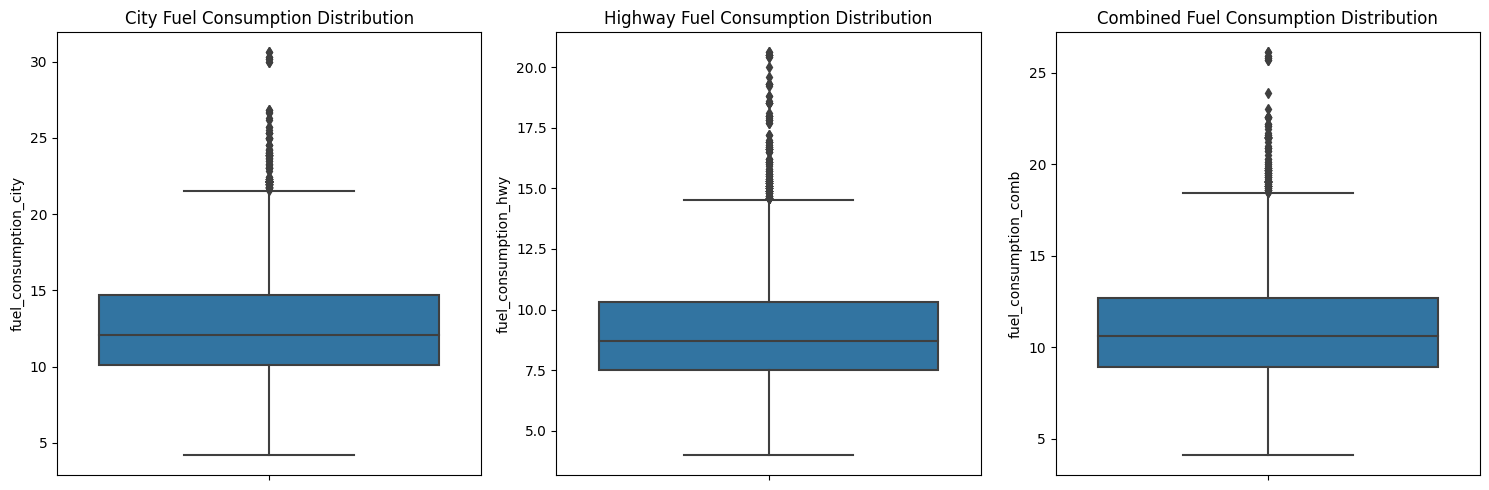

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, y='fuel_consumption_city', ax=axes[0])
axes[0].set_title('City Fuel Consumption Distribution')

sns.boxplot(data=df, y='fuel_consumption_hwy', ax=axes[1])
axes[1].set_title('Highway Fuel Consumption Distribution')

sns.boxplot(data=df, y='fuel_consumption_comb', ax=axes[2])
axes[2].set_title('Combined Fuel Consumption Distribution')
plt.tight_layout()
plt.show()

## **CO2 Emissions by Vehicle Class**

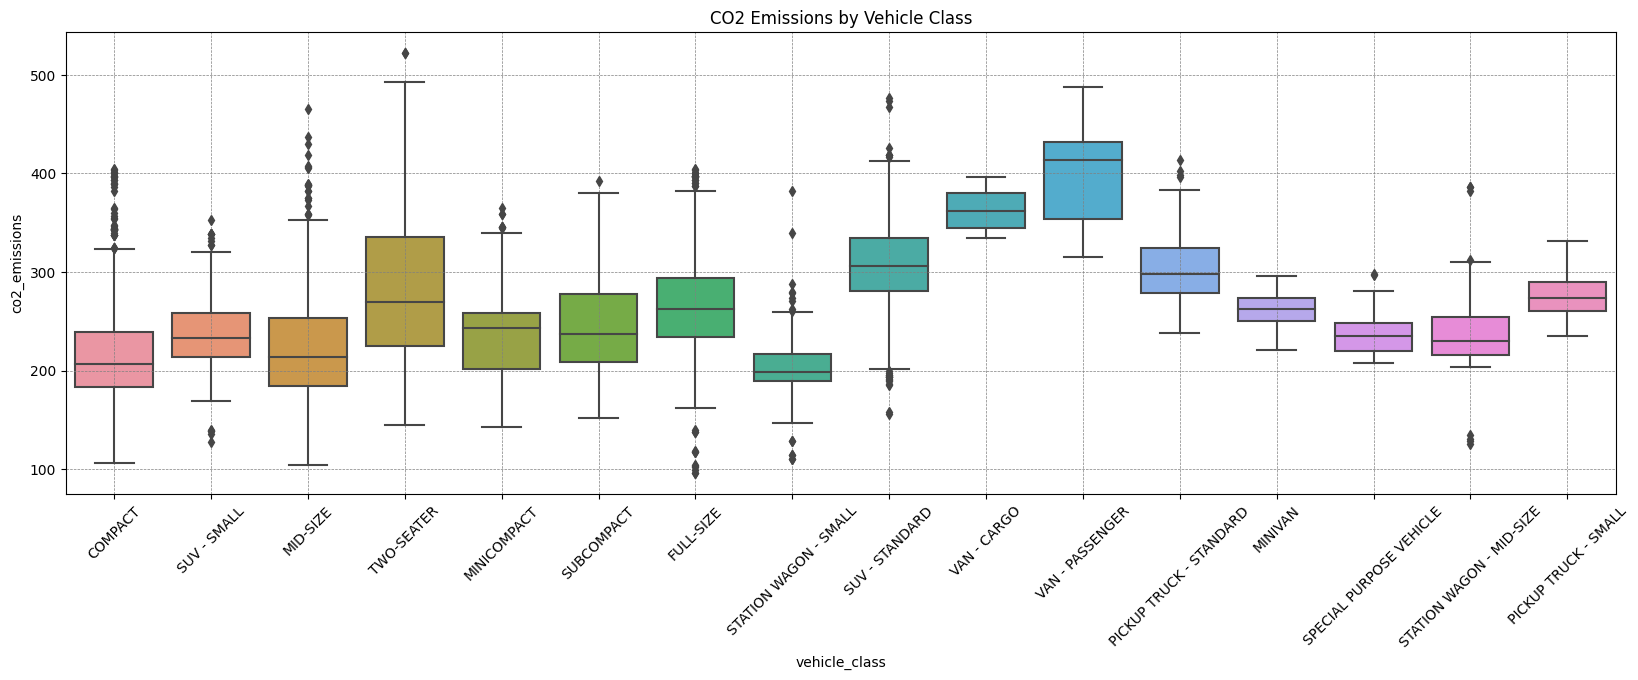

In [23]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='vehicle_class', y='co2_emissions')
plt.xticks(rotation=45)
plt.title('CO2 Emissions by Vehicle Class')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.show()


## **CO2 Emissions by Number of Cylinders**

***Fuel consumption and CO2 emissions by number of cylinders***

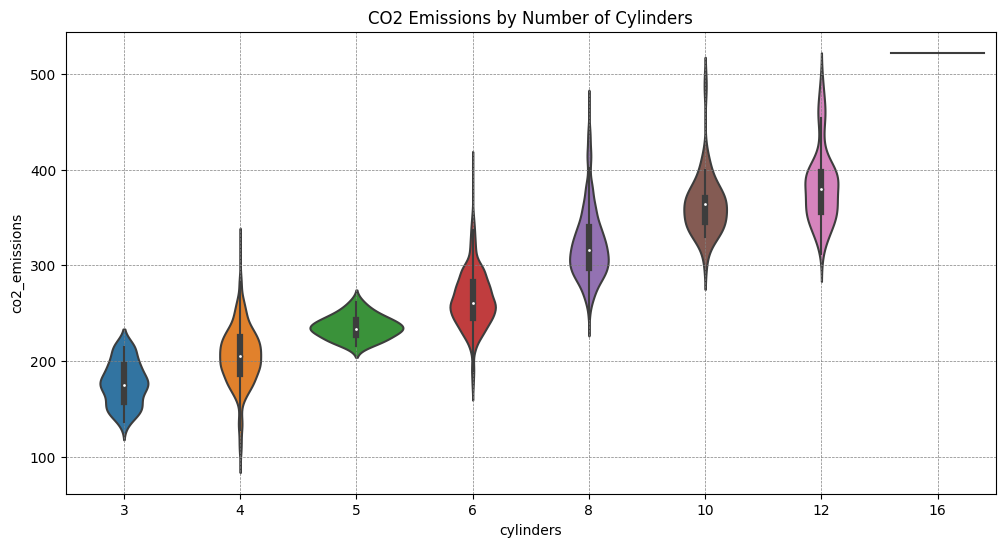

In [24]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='cylinders', y='co2_emissions')
plt.title('CO2 Emissions by Number of Cylinders')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.show()

## **Summary of Categorical Variables**

In [25]:
# Statistical summary report
print("\nSummary of Categorical Variables:")
for col in ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']:
    print(f"\nDistribution of {col.upper()}:")
    print(df[col].value_counts().head())


Summary of Categorical Variables:

Distribution of MAKE:
make
FORD             577
CHEVROLET        515
BMW              501
MERCEDES-BENZ    365
PORSCHE          296
Name: count, dtype: int64

Distribution of MODEL:
model
F-150 FFV        32
F-150 FFV 4X4    31
MUSTANG          27
FOCUS FFV        24
F-150 4X4        20
Name: count, dtype: int64

Distribution of VEHICLE_CLASS:
vehicle_class
SUV - SMALL       1006
MID-SIZE           983
COMPACT            903
SUV - STANDARD     613
SUBCOMPACT         533
Name: count, dtype: int64

Distribution of TRANSMISSION:
transmission
AS6    1139
AS8    1056
M6      773
A6      684
AM7     383
Name: count, dtype: int64

Distribution of FUEL_TYPE:
fuel_type
X    3039
Z    2765
E     330
D     147
N       1
Name: count, dtype: int64


## **Average CO2 Emissions by Top 15 Manufacturers**

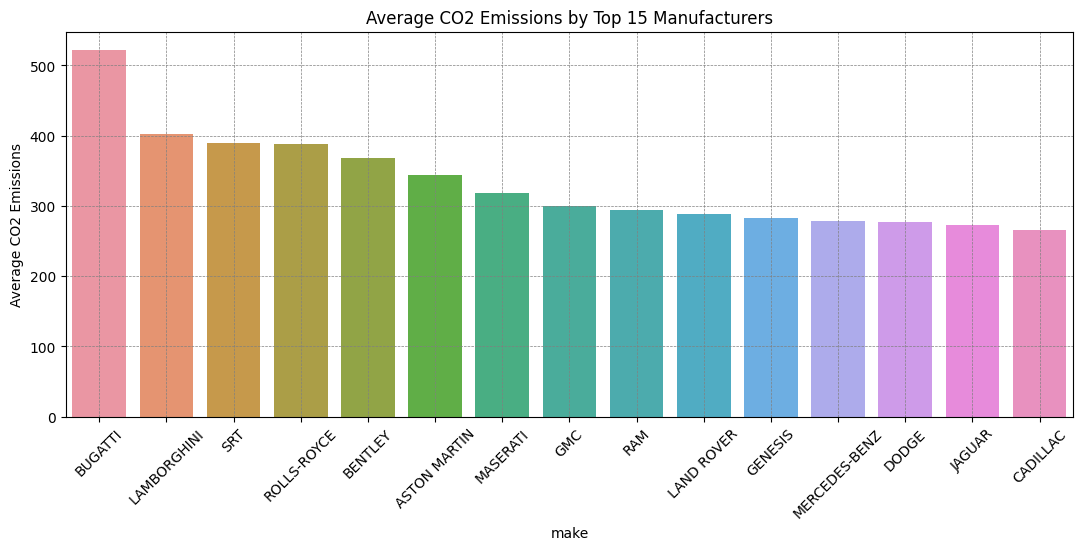

In [26]:
plt.figure(figsize=(13, 5))
avg_co2_by_make = df.groupby('make')['co2_emissions'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=avg_co2_by_make.index, y=avg_co2_by_make.values)
plt.title('Average CO2 Emissions by Top 15 Manufacturers')
plt.xticks(rotation=45)
plt.ylabel('Average CO2 Emissions')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.show()


## **City vs Highway Fuel Consumption Comparison**

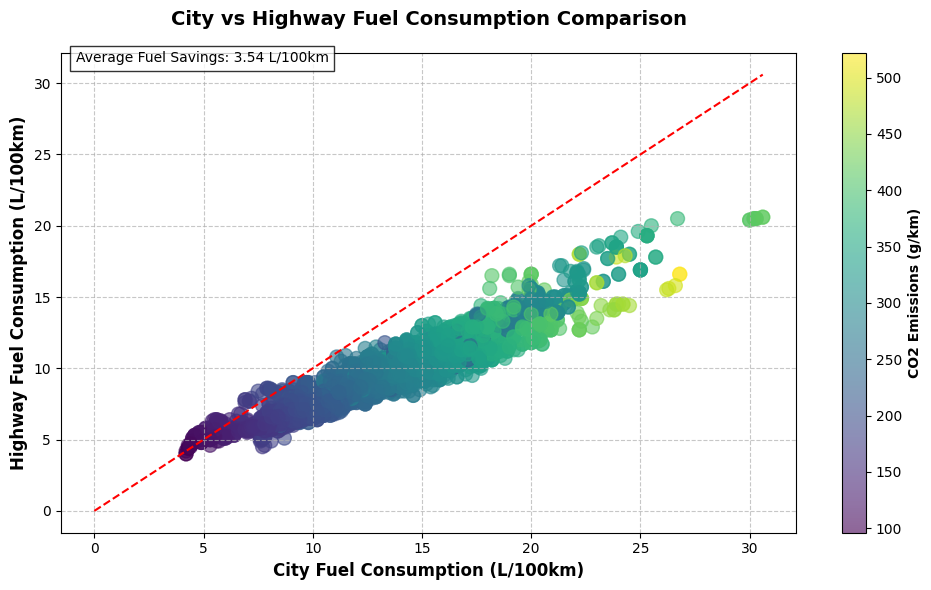

In [27]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(df['fuel_consumption_city'], 
                     df['fuel_consumption_hwy'],
                     alpha=0.6,
                     c=df['co2_emissions'],
                     cmap='viridis',
                     s=100)

plt.plot([0, max(df['fuel_consumption_city'])], 
         [0, max(df['fuel_consumption_city'])], 
         'r--', 
         label='Equal Consumption Line')

plt.xlabel('City Fuel Consumption (L/100km)', fontsize=12, fontweight='bold')
plt.ylabel('Highway Fuel Consumption (L/100km)', fontsize=12, fontweight='bold')
plt.title('City vs Highway Fuel Consumption Comparison', 
          fontsize=14, 
          fontweight='bold', 
          pad=20)

plt.grid(True, linestyle='--', alpha=0.7)

colorbar = plt.colorbar(scatter)
colorbar.set_label('CO2 Emissions (g/km)', fontsize=10, fontweight='bold')

avg_diff = (df['fuel_consumption_city'] - df['fuel_consumption_hwy']).mean()
plt.text(0.02, 0.98, 
         f'Average Fuel Savings: {avg_diff:.2f} L/100km', 
         transform=plt.gca().transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## **Fuel Consumption vs CO2 Emissions by Vehicle Class**

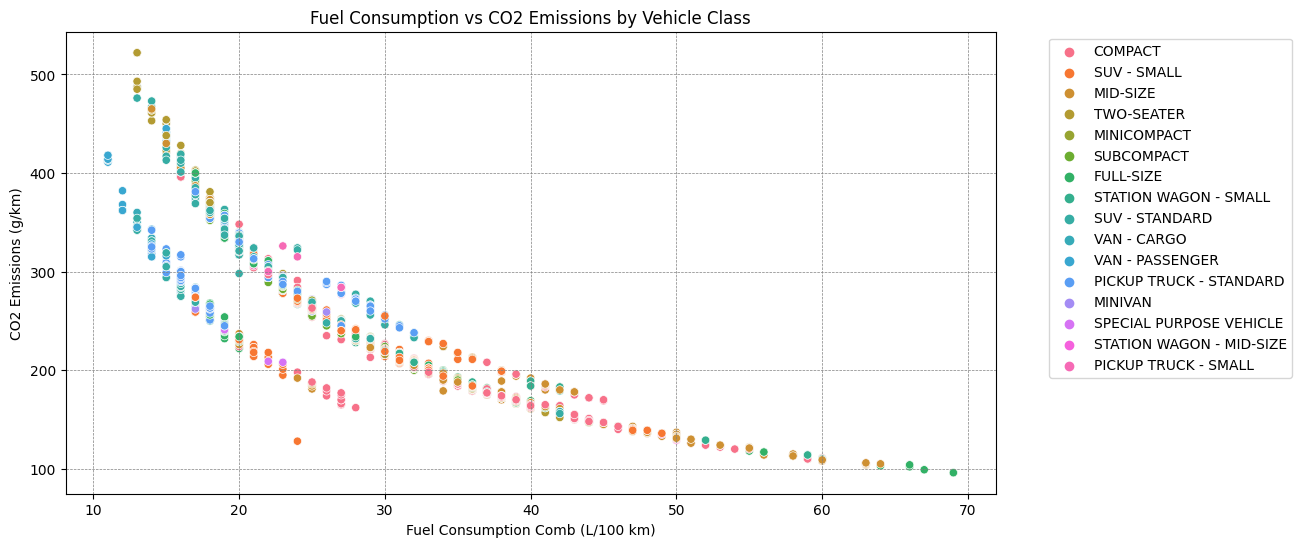

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="fuel_consumption_comb_(mpg)", y="co2_emissions", hue="vehicle_class", data=df)
plt.title("Fuel Consumption vs CO2 Emissions by Vehicle Class")
plt.xlabel("Fuel Consumption Comb (L/100 km)")
plt.ylabel("CO2 Emissions (g/km)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.show()

# **Preprocessing**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make                         6282 non-null   object 
 1   model                        6282 non-null   object 
 2   vehicle_class                6282 non-null   object 
 3   engine_size                  6282 non-null   float64
 4   cylinders                    6282 non-null   int64  
 5   transmission                 6282 non-null   object 
 6   fuel_type                    6282 non-null   object 
 7   fuel_consumption_city        6282 non-null   float64
 8   fuel_consumption_hwy         6282 non-null   float64
 9   fuel_consumption_comb        6282 non-null   float64
 10  fuel_consumption_comb_(mpg)  6282 non-null   int64  
 11  co2_emissions                6282 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 638.0+ KB


## ***Label Encoding***

***There are several categorical columns in the data set, and since there are many variables in some of these columns, we used a label encoder to train model better.***

In [30]:
columns_to_encode = ['make','model','vehicle_class','transmission','fuel_type']
label_encoders = {}

for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le # We keep encoders for recycling

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make                         6282 non-null   int64  
 1   model                        6282 non-null   int64  
 2   vehicle_class                6282 non-null   int64  
 3   engine_size                  6282 non-null   float64
 4   cylinders                    6282 non-null   int64  
 5   transmission                 6282 non-null   int64  
 6   fuel_type                    6282 non-null   int64  
 7   fuel_consumption_city        6282 non-null   float64
 8   fuel_consumption_hwy         6282 non-null   float64
 9   fuel_consumption_comb        6282 non-null   float64
 10  fuel_consumption_comb_(mpg)  6282 non-null   int64  
 11  co2_emissions                6282 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 638.0 KB


In [32]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_(mpg),co2_emissions
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244


In [33]:
y= df['co2_emissions'].values
x= df.drop(columns=['co2_emissions']).values

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75,random_state=42)

## ***Scaling*** 

***Scaling the values between 1 and 0 will speed up the model training process, so we used MinMaxScaler().***

In [35]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# **Model Building**

In [36]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,345 (67.75 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 384 (1.50 KB)

## **EarlyStopping**

In [37]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_test,y_test),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 58769.4531 - mae: 234.6212 - val_loss: 19370.2812 - val_mae: 133.5410
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2261.3396 - mae: 35.8059 - val_loss: 3429.8945 - val_mae: 44.6798
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1058.5442 - mae: 25.5840 - val_loss: 1053.2053 - val_mae: 23.7335
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1001.5889 - mae: 24.5209 - val_loss: 250.6189 - val_mae: 11.2465
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 875.4267 - mae: 23.0854 - val_loss: 249.3746 - val_mae: 12.4887
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 801.1423 - mae: 22.0160 - val_loss: 92.6791 - val_mae: 6.8518
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 807.2661 - mae: 22.3227 - val_loss: 160.8650 - val_mae: 9.2188
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 767.8243 - mae: 21.5697 - val_loss: 161.2041 - val_mae:

# **Results of the Model**

In [38]:
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MSE: {test_loss:.2f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 38.0633 - mae: 4.5424
Test MAE: 4.69
Test MSE: 40.27


In [39]:
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print(f"R² Skoru: {r2:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
R² Skoru: 0.9889


# **Visualization of the Model's Results**

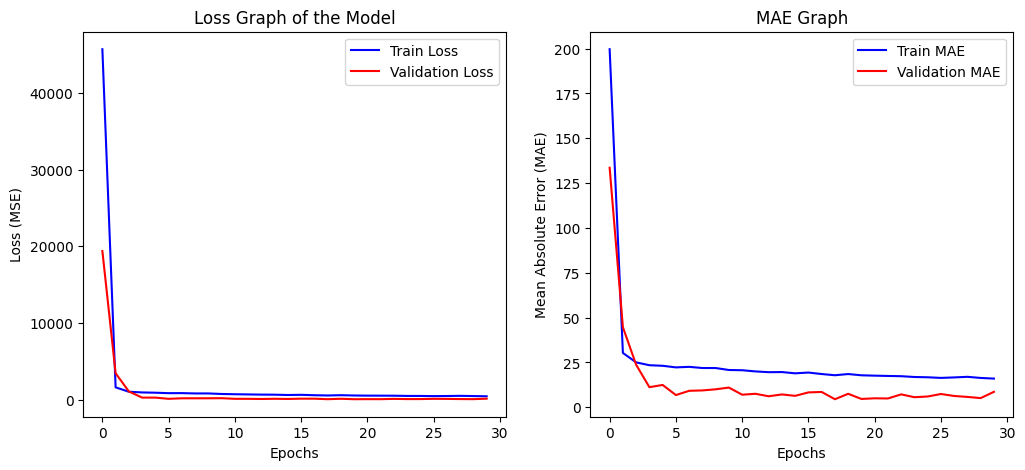

In [40]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='b', label='Train Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss Graph of the Model')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], color='b', label='Train MAE')
plt.plot(history.history['val_mae'], color='r', label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Graph')
plt.legend()

plt.show()

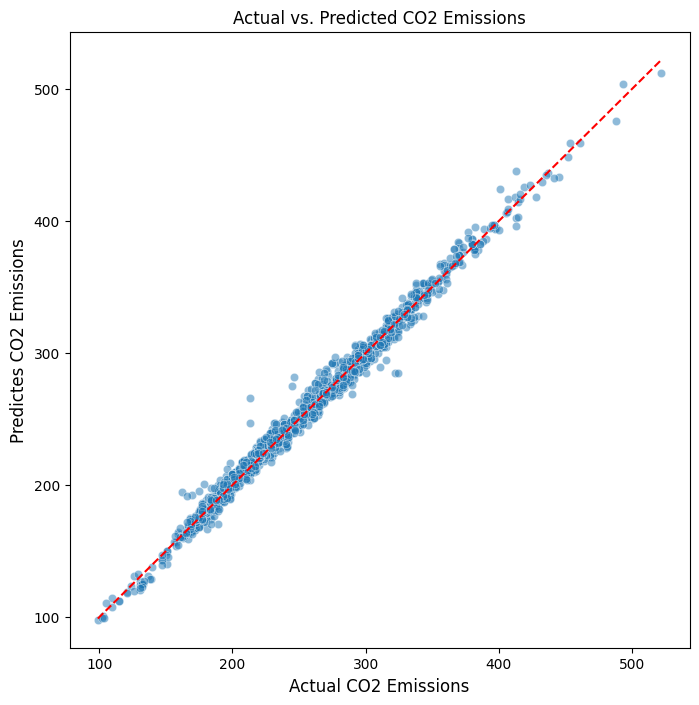

In [41]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual CO2 Emissions", fontsize=12)
plt.ylabel("Predictes CO2 Emissions", fontsize=12)
plt.title("Actual vs. Predicted CO2 Emissions", fontsize=12)
plt.show()

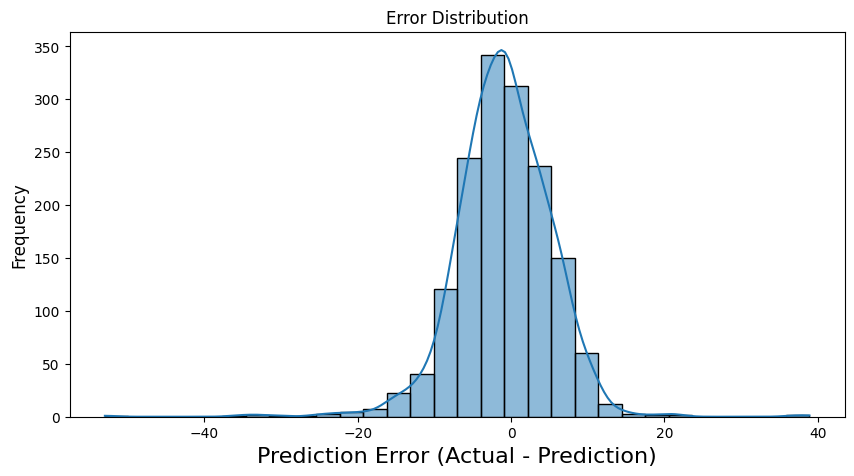

In [42]:
errors = y_test - y_pred.flatten()

plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Prediction Error (Actual - Prediction)", fontsize=16)
plt.ylabel("Frequency", fontsize=12)
plt.title("Error Distribution", fontsize=12)
plt.show()